# Passo 0 - Entender a ideia do trabalho

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable: 1 and Not potable: 0

fonte: https://www.kaggle.com/datasets/adityakadiwal/water-potability/data

In [2]:
# Passo 1 - Importar a base de dados

import pandas as pd

tabela = pd.read_csv('water_potability.csv', sep=';')

display(tabela)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.600000,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,364.639673,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,360.762904,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,359.948574,392.449580,19.903225,68.266548,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,359.948574,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,359.948574,402.883113,11.168946,77.488213,4.708658,1


In [3]:
# Passo 2 - Preparar a base de dados para a IA

display(tabela.info())

# y -> colunas de base de dados que eu quero prever
y = tabela['Potability']
# x -> colunas de base de dados que eu vou usar para fazer a previsão
x = tabela.drop(columns='Potability')

# Verificar balanceamento da base
display(tabela['Potability'].value_counts(normalize=True))

#Separar em dados de treino e dados de teste
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.25)

# === NORMALIZAÇÃO DOS DADOS ===
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_treino = pd.DataFrame(scaler.fit_transform(x_treino), columns=x.columns)
x_teste = pd.DataFrame(scaler.transform(x_teste), columns=x.columns)

display(x_treino)
display(x_teste)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


None

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.042998,1.652853,-2.010740,0.676601,-1.045057,-1.949246,1.229339,0.118497,0.580803
1,-1.549268,-0.810564,-1.713477,1.165738,-0.408716,-1.687806,-1.885130,-0.180156,0.222830
2,-1.084478,1.940937,-1.355021,1.582872,-2.185706,-0.357180,0.353743,-0.047239,0.041631
3,-0.908400,0.225856,0.594802,-0.337165,0.876571,-0.799254,-0.974987,0.146376,2.103372
4,0.095933,0.895900,-1.933964,-0.667314,0.717403,-1.620221,-2.646899,0.924538,0.052245
...,...,...,...,...,...,...,...,...,...
2452,-0.099364,-0.223617,0.608890,0.545007,0.559217,0.490908,-0.589340,0.530735,0.703223
2453,0.108274,-1.498220,1.743970,-0.922339,-1.402786,-0.368760,-0.303857,-0.182520,-0.106250
2454,0.583032,2.533330,0.588824,1.312796,2.341132,-0.829699,0.216003,-0.604010,-0.394181
2455,-2.064033,-0.138704,-0.537480,0.348937,-0.700526,-0.243487,-1.431156,-1.309394,1.409012


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.060569,-0.084758,-0.863558,-0.945544,-0.284162,0.070932,-0.485608,1.626571,0.577747
1,0.008470,-1.928081,-0.429653,-0.774440,-0.943775,-0.130392,-0.851821,1.640041,-0.839765
2,0.686717,-0.134079,-0.562797,0.479104,-0.006419,0.088794,-0.301072,-0.766917,1.143267
3,-0.511134,-1.282614,0.115888,-0.193323,-1.106129,-0.055932,-0.136836,-0.041895,-0.741320
4,2.216376,0.119192,-1.528960,1.693478,2.803221,0.595838,-0.054148,-0.149140,-0.499742
...,...,...,...,...,...,...,...,...,...
814,1.461930,-1.182229,1.091939,-0.227950,2.143023,0.474531,-0.686639,1.695679,-0.158586
815,-1.286620,-0.200566,-0.026032,-1.748398,0.196198,-1.130457,0.119135,-1.029637,1.535712
816,-0.690854,1.238874,1.460094,-1.370955,0.728684,1.391217,1.428626,1.318692,-0.241292
817,-1.430981,0.303167,0.880164,0.239331,-1.241234,0.055920,1.920450,0.983087,-0.092513


In [4]:
#Passo 3 - Aplicação da IA

#Modelos usado: Nota de potabilidade (Sim/Não)
#Árvore de Decisão -> RandomForest
#Neirest Neighnors (KNN) -> Vizinhos Próximos

#Importar a IA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#criar a IA
modelo_arvoredescisao = RandomForestClassifier(class_weight='balanced')
modelo_knn = KNeighborsClassifier()

# === VALIDAÇÃO CRUZADA ===
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Normaliza todos os dados antes da validação cruzada
x_val = pd.DataFrame(StandardScaler().fit_transform(x), columns=x.columns)

# Validação cruzada - Random Forest
print("Validação cruzada - Random Forest:")
scores_rf = cross_val_score(modelo_arvoredescisao, x_val, y, cv=5, scoring='accuracy')
print("Acurácias por fold:", scores_rf)
print("Acurácia média:", scores_rf.mean())

# Validação cruzada - KNN
print("Validação cruzada - KNN:")
scores_knn = cross_val_score(modelo_knn, x_val, y, cv=5, scoring='accuracy')
print("Acurácias por fold:", scores_knn)
print("Acurácia média:", scores_knn.mean())

# Treinamento
modelo_arvoredescisao.fit(x_treino,y_treino)
modelo_knn.fit(x_treino, y_treino)

Validação cruzada - Random Forest:
Acurácias por fold: [0.62195122 0.65496183 0.64580153 0.59389313 0.67022901]
Acurácia média: 0.6373673431390803
Validação cruzada - KNN:
Acurácias por fold: [0.60213415 0.61221374 0.60152672 0.56946565 0.62137405]
Acurácia média: 0.6013428598026438


KNeighborsClassifier()


Acurácia:
Árvore de Decisão: 0.6606
KNN: 0.6190

Relatório de Classificação:
Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.66      0.90      0.76       497
           1       0.65      0.30      0.41       322

    accuracy                           0.66       819
   macro avg       0.66      0.60      0.59       819
weighted avg       0.66      0.66      0.62       819

KNN:
              precision    recall  f1-score   support

           0       0.65      0.80      0.72       497
           1       0.52      0.34      0.41       322

    accuracy                           0.62       819
   macro avg       0.59      0.57      0.56       819
weighted avg       0.60      0.62      0.60       819


Matriz de Confusão:
Árvore de Decisão


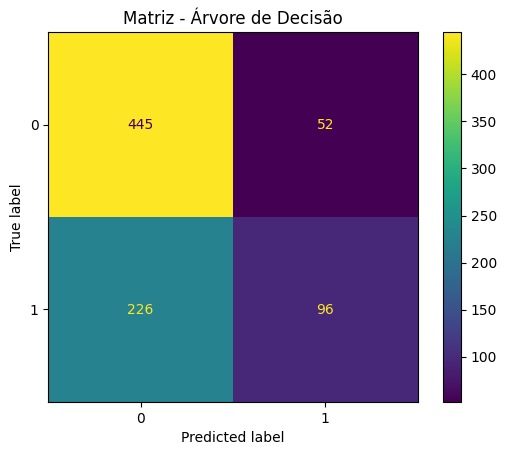

KNN


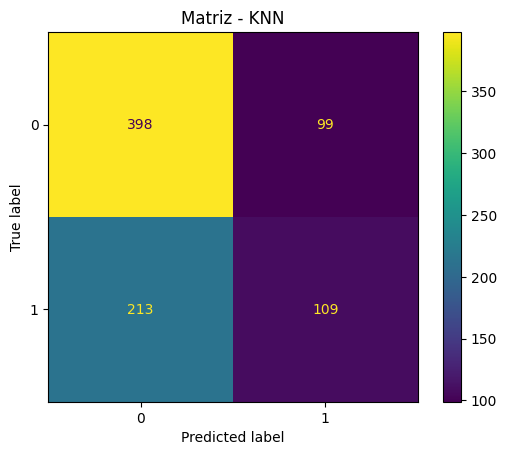

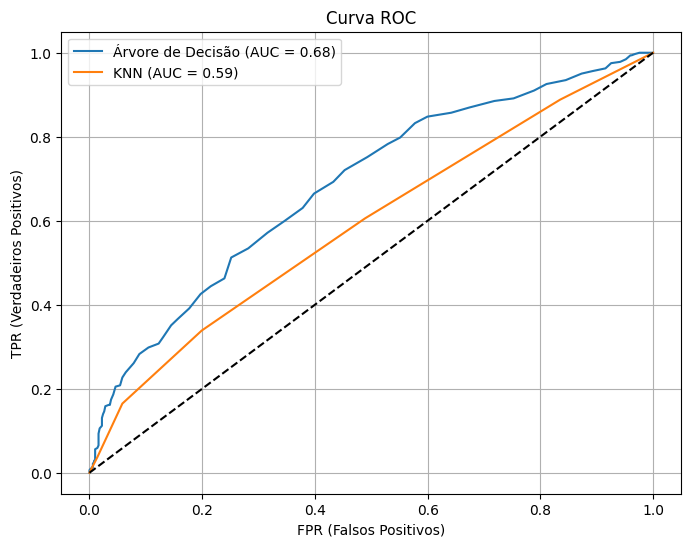

In [5]:
# Passo 4 - Escolher o melhor modelo
previsao_arvoredescisao = modelo_arvoredescisao.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste)

# Analisando o modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print("\nAcurácia:")
print(f"Árvore de Decisão: {accuracy_score(y_teste, previsao_arvoredescisao):.4f}")
print(f"KNN: {accuracy_score(y_teste, previsao_knn):.4f}")

# Relatório de Classificação
print("\nRelatório de Classificação:")
print("Árvore de Decisão:")
print(classification_report(y_teste, previsao_arvoredescisao))

print("KNN:")
print(classification_report(y_teste, previsao_knn))

# Matriz de Confusão
print("\nMatriz de Confusão:")
print("Árvore de Decisão")
ConfusionMatrixDisplay(confusion_matrix(y_teste, previsao_arvoredescisao)).plot()
plt.title("Matriz - Árvore de Decisão")
plt.show()

print("KNN")
ConfusionMatrixDisplay(confusion_matrix(y_teste, previsao_knn)).plot()
plt.title("Matriz - KNN")
plt.show()

# Curva ROC e AUC
prob_arvore = modelo_arvoredescisao.predict_proba(x_teste)[:, 1]
prob_knn = modelo_knn.predict_proba(x_teste)[:, 1]

fpr_arvore, tpr_arvore, _ = roc_curve(y_teste, prob_arvore)
fpr_knn, tpr_knn, _ = roc_curve(y_teste, prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_arvore, tpr_arvore, label=f"Árvore de Decisão (AUC = {roc_auc_score(y_teste, prob_arvore):.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_score(y_teste, prob_knn):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR (Falsos Positivos)")
plt.ylabel("TPR (Verdadeiros Positivos)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Passo 5 - Usar o melhor modelo para fazer a previsão
#melhor modelo: modelo_arvoredescisao

import pandas as pd

#Importar a base de dados
tabela2 = pd.read_csv('new_water_potability.csv', sep=';')

display(tabela2)

# Fazer a previsão normalmente
nova_previsao = modelo_arvoredescisao.predict(tabela2.drop(columns=['Potability']))

# Transformar em DataFrame para visualizar melhor
nova_previsao_df = pd.DataFrame(nova_previsao, columns=["Potability"])

# Mostrar como tabela
display(nova_previsao_df)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.98,201.980,2589.698,8.97800,250.6540,2000.99940,15.987400,96.98410,3.98456,NaN
1,7.90,89.990,2000.698,7.98700,301.9870,501.98700,15.986321,75.96310,14.98710,NaN
2,5.00,199.669,1500.993,9.01596,750.9843,415.98741,18.698400,50.94713,0.69841,NaN


,Potability
0,0
1,0
2,0
